In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression
import nevergrad as ng
import time


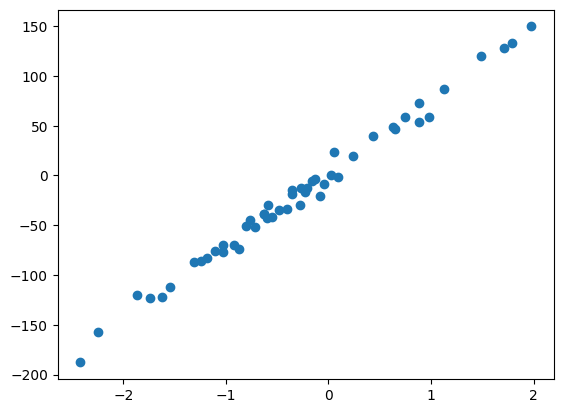

In [3]:
dset = make_regression(n_samples=50,n_features=1,noise=8,random_state=3)
# dset = dset[0].reshape(100)
plt.scatter(dset[0],dset[1])

In [11]:
x = dset[0]
y = dset[1]

c = 0
m = 0
iteration = 100
learning_rate = 0.4

error_list = []
c_list = []
m_list = []

'''total_error = 1/n * sum(y_i - y_i^)
total_error = 1/n * sum(y_i - (c + m*x_i))^2 '''
for i in range(iteration):
    total_error = np.sum((y - (c + m*x).T)**2)/y.shape[0]
    grad_m = -2*np.sum(x.T*(y - (c + m*x).T))/y.shape[0]
    grad_c = -2*np.sum((y - (c + m*x).T))/y.shape[0]
    m = m - learning_rate*grad_m
    c = c - learning_rate*grad_c
    error_list.append(total_error)
    c_list.append(c)
    m_list.append(m)
    

print("Intercept (B0) value: {}".format(c))
print("B1 value: {}".format(m))
print("Last error: {}".format(error_list[-1]))

# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# surf = ax.plot_surface(np.array(error_list),np.array(c_list),np.array(m_list), rstride=1, cstride=1,
#                        linewidth=0, antialiased=False, shade=False)

# plt.show()
def linear_regression_obj(params,x,y):
    total_error = np.sum((y - (params["c"] + params["m"]*x).T)**2)/y.shape[0]
    return total_error


#NEVERGRAD OPTIMIZATION
parametrization =ng.p.Dict(
    c=ng.p.Scalar(),
    m=ng.p.Scalar()
    )
optimization_function = lambda params: linear_regression_obj(params, x, y)
dimension = 2 

optimizer = ng.optimizers.NGOpt(parametrization=parametrization, budget=100)

recommendation = optimizer.minimize(optimization_function)
# Get the best hyperparameters
best_hyperparameters = recommendation.args

print("Best Hyperparameters:", best_hyperparameters)

Intercept (B0) value: 2.316134438155686
B1 value: 72.91141569636065
Last error: 53.11865758516271
Best Hyperparameters: ({'c': 2.3161344381530666, 'm': 72.91141569356401},)


In [5]:
skleanr_lin_reg = LinearRegression()
skleanr_lin_reg.fit(dset[0],y)
print(skleanr_lin_reg.intercept_)
print(skleanr_lin_reg.coef_)

2.3161344381556717
[72.9114157]


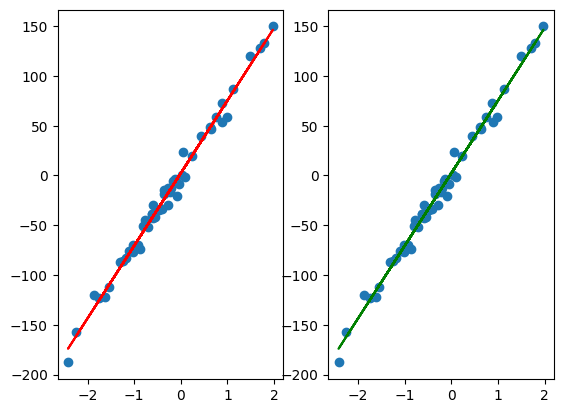

In [6]:
def lin_reg_fun(x):
    return c + m*x

def lin_reg_fun_sklearn(x):
    return skleanr_lin_reg.intercept_ + skleanr_lin_reg.coef_*x

lin_reg = lin_reg_fun(x) 
lin_reg_sklearn = lin_reg_fun_sklearn(x) 

fig,ax = plt.subplots(1,2)

ax[0].scatter(x,y)
ax[0].plot(x,lin_reg,color="red")
ax[1].scatter(x,y)
ax[1].plot(x,lin_reg_sklearn,color="green")



Text(0.5, 0, 'z')

<Figure size 640x480 with 0 Axes>

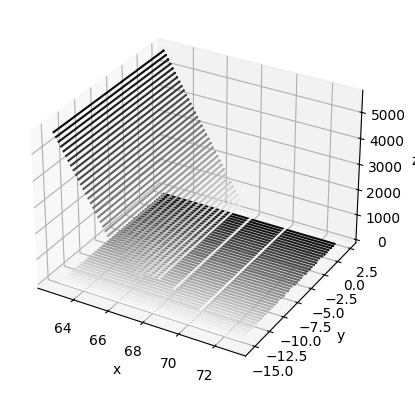

In [236]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook, cm
from matplotlib.colors import LightSource
fig = plt.figure()
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(np.array(m_list) ,np.array(c_list))
Z1 = np.meshgrid(np.array(error_list) ,np.array(c_list))[0]
Z2 = np.meshgrid(np.array(error_list) ,np.array(c_list))[1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z1, 50, cmap='binary')
ax.contour3D(X,Y,Z2, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')